## Practical Work 2

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [61]:
import numpy as np
import pandas as pd
import random
from matplotlib import pyplot as plt
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [62]:
x = np.linspace(0, 20)
a = -2
b = 1
y = a*x + b

In [63]:
df = pd.DataFrame({'x':x, 'y':y})
df

,x,y
0,0.000000,1.000000
1,0.408163,0.183673
2,0.816327,-0.632653
3,1.224490,-1.448980
4,1.632653,-2.265306
5,2.040816,-3.081633
6,2.448980,-3.897959
7,2.857143,-4.714286
8,3.265306,-5.530612
9,3.673469,-6.346939


In [64]:
print(x)
print("-------------------------------------------------------------------------------------------")
print(y)

[ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ]
-------------------------------------------------------------------------------------------
[  1.           0.18367347  -0.63265306  -1.44897959  -2.26530612
  -3.08163265  -3.89795918  -4.71428571  -5.53061224  -6.34693878
  -7.16326531  -7.97959184  -8.79591837  -9.6122449  -10.42857143
 -11.24489796 -12.06122449 -12.87755102 -13.69387755 -14.51020408
 -15.32653061 -16.14285714 -16.9591

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Note: you can choose any suitable stop criteria.

In [65]:
theta_0 = 0
theta_1 = 0
alpha = 0.001
iterations = 100

In [66]:
def calc_cost_vectorize(theta_0,theta_1,x,y):
    sigma = ((theta_0 + theta_1 * x) - y)**2
    sigma = sigma.sum()
    return sigma/(2*len(x))
    
j = calc_cost_vectorize(0,0,x,y)
j

249.88775510204087

In [67]:
def theta_0_diff_vectorize(theta_0,theta_1,x,y):
    sigma = ((theta_0 + theta_1 * x)-y)
    sigma = sigma.sum()
    return sigma/(len(x))


dt0 = theta_0_diff_vectorize(0,0,x,y)
dt0

19.0

In [68]:
def theta_1_diff_vectorize(theta_0,theta_1,x,y):
    sigma = ((theta_0 + theta_1 * x)-y)*x
    sigma = sigma.sum()
    return sigma/(len(x))

dt1 = theta_1_diff_vectorize(0,0,x,y)
dt1

259.38775510204084

In [69]:
loss = []
theta_0_list = []
theta_1_list = []
hypo_list = []
def gd_v3(theta_0,theta_1,x,y,alpha,iterations):
    theta_0_list.append(0)
    theta_1_list.append(0)
    for i in range(iterations):
        hypo = theta_0 + theta_1*x
        hypo_list.append(hypo)
        j = calc_cost_vectorize(theta_0,theta_1,x,y)
        loss.append(j)
        dt0 = theta_0_diff_vectorize(theta_0,theta_1,x,y)
        dt1 = theta_1_diff_vectorize(theta_0,theta_1,x,y)
        theta_0 = theta_0 - alpha*dt0 
        theta_0_list.append(theta_0)
        theta_1 = theta_1 - alpha*dt1
        theta_1_list.append(theta_1)
        
        if (dt0 < 0.001) & (dt1 < 0.001):
            break
            
    j = calc_cost_vectorize(theta_0,theta_1,x,y)
    loss.append(j)
            
    return theta_0,theta_1,loss,theta_0_list,theta_1_list,hypo_list
            

#### Try your function with any input parameterss of your choice.

In [70]:
theta_0,theta_1,loss,theta_0_history,theta_1_history,hypo_history = gd_v3(0,0,x,y,alpha,iterations)
print(theta_0,theta_1)

-0.11354954451864654 -1.9171689348740093


#### Calculate r2 score

In [71]:
hypo = theta_0 + theta_1*x

In [72]:
from sklearn.metrics import r2_score
r2 = r2_score(y,hypo)
print('r2 score is: ', r2)

r2 score is:  0.9976984742382373


#### Plot loss vs. epochs

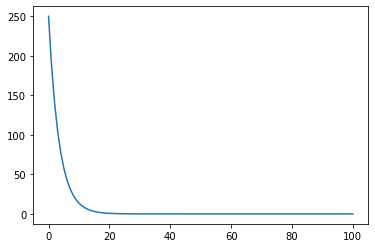

In [73]:
plt.plot(loss)

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

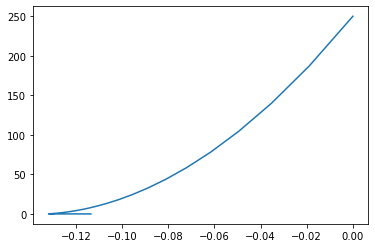

In [74]:
plt.plot(theta_0_list,loss)

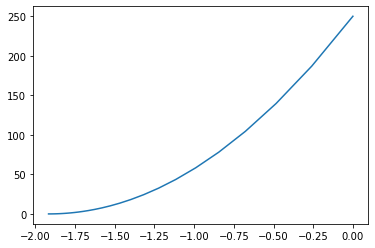

In [75]:
plt.plot(theta_1_list,loss)

#### Plot all regression lines till converge

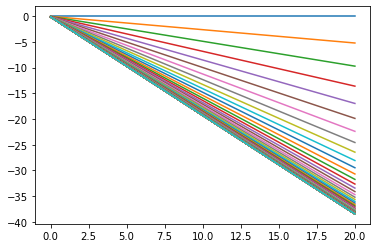

In [76]:
for i in range(iterations):
    plt.plot(x,hypo_history[i])

#### Plot the best regression line

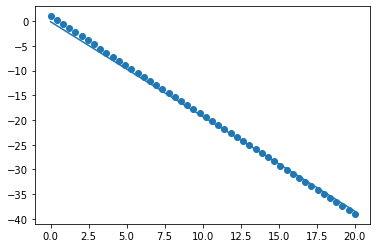

In [77]:
plt.scatter(x,y)
plt.plot(x,hypo)

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

In [78]:
theta_0,theta_1,loss,theta_0_history,theta_1_history,hypo_history = gd_v3(0,0,x,y,0.01,500)
print(theta_0,theta_1)

-0.11871224489795916 -1.674960849645981


In [79]:
hypo = theta_0 + theta_1*x

In [80]:
r2 = r2_score(y,hypo)
print('r2 score is: ', r2)

r2 score is:  0.9408434514159683


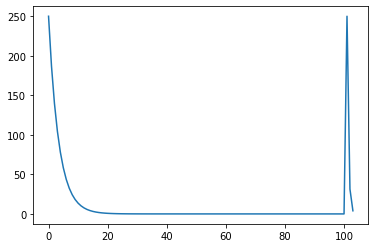

In [81]:
plt.plot(loss)

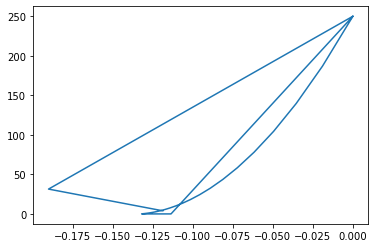

In [82]:
plt.plot(theta_0_list,loss)

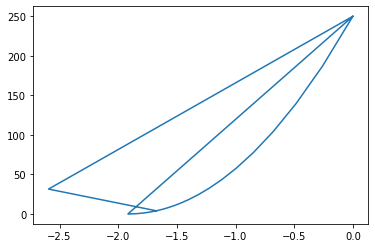

In [83]:
plt.plot(theta_1_list,loss)

In [84]:
theta_0,theta_1,loss,theta_0_history,theta_1_history,hypo_history = gd_v3(0,0,x,y,0.00001,500)
print(theta_0,theta_1)

-0.06864848025110683 -0.9426623248064118


In [85]:
hypo = theta_0 + theta_1*x

In [86]:
r2 = r2_score(y,hypo)
print('r2 score is: ', r2)

r2 score is:  0.06953086068205017


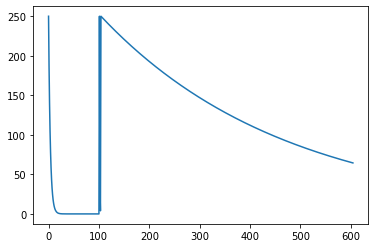

In [87]:
plt.plot(loss)

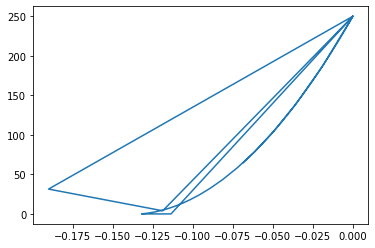

In [88]:
plt.plot(theta_0_list,loss)

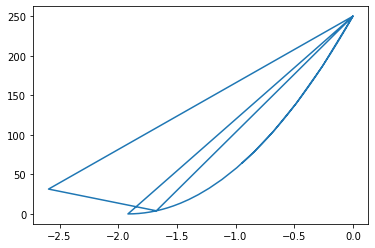

In [89]:
plt.plot(theta_1_list,loss)

#### Update the implementation of the Batch GD to be Mini-Batch and repeat the above plots and evaluations
#### Change batch size and see the effect
### Note: Try once without shuffling the data and once with shuffle and see the effect on the output.

In [90]:
theta_0 = 0
theta_1 = 0
epochs = 100
alpha = 0.001
num_of_batches = 10

In [91]:
def calc_cost_vectorize(theta_0,theta_1,x,y,num_of_batches):
    sigma = ((theta_0 + theta_1 * x) - y)**2
    sigma = sigma.sum()
    return sigma/(2*(len(x))/num_of_batches)
    
j = calc_cost_vectorize(0,0,x,y,num_of_batches)
j

2498.8775510204086

In [92]:
def theta_0_diff_vectorize(theta_0,theta_1,x,y,num_of_batches):
    sigma = ((theta_0 + theta_1 * x)-y)
    sigma = sigma.sum()
    return (sigma)/((len(x))/num_of_batches)

dt0 = theta_0_diff_vectorize(0,0,x,y,num_of_batches)
dt0

190.0

In [93]:
def theta_1_diff_vectorize(theta_0,theta_1,x,y,num_of_batches):
    sigma = ((theta_0 + theta_1 * x)-y)*x
    sigma = sigma.sum()
    return (sigma)/((len(x))/num_of_batches)

dt1 = theta_1_diff_vectorize(0,0,x,y,num_of_batches)
dt1

2593.877551020408

In [94]:
loss = []
theta_0_list = []
theta_1_list = []
hypo_list = []
def mini_batch(theta_0,theta_1,x,y,alpha,num_of_batches):
    for i in range(int(len(x)/num_of_batches)):
        hypo = theta_0 + theta_1*x
        hypo_list.append(hypo)
        j = calc_cost_vectorize(theta_0,theta_1,x,y,2)
        loss.append(j)
        dt0 = theta_0_diff_vectorize(theta_0,theta_1,x,y,2)
        dt1 = theta_1_diff_vectorize(theta_0,theta_1,x,y,2)
        theta_0 = theta_0 + alpha*dt0
        theta_0_list.append(theta_0)
        theta_1 = theta_1 + alpha*dt1
        theta_1_list.append(theta_1)
    return theta_0,theta_1,loss,theta_0_history,theta_1_history,hypo_history


In [95]:
theta_0,theta_1,loss,theta_0_history,theta_1_history,hypo_history = mini_batch(theta_0,theta_1,x,y,alpha,epochs)
print(theta_0,theta_1)

0 0


In [96]:
def cost_vectorize(t0,t1,x,y):
    error = []
    error = (-y+(t0+t1*x))**2
    return (sum(error)/(2*len(x)))
    
def diff_theta_0(t0,t1,x,y):
    error = []
    error = (-y+(t0+t1*x))
    return sum(error)/len(x)

def diff_theta_1(t0,t1,x,y):
    error = 0
    for i in range(len(x)):
        error = (-y+(t0+t1*x))*x
    return sum(error)/len(x)
        
def mini_Batch_gd(x_points,y_points, alpha, iterations,batch):
    theta0 = 0
    theta1 = 0
    loss = []
    theta0A = []
    theta1A = []
    hypothesis = []
    loss.append(cost_vectorize(theta0,theta1,x_points,y_points))
    for i in range(iterations):
        for q in range(0,len(x_points)-batch,batch):
            j = cost_vectorize(theta0,theta1,x_points[q:q+batch],y_points[q:q+batch])
            #print(j)
            
            #hypothesis.append(theta0 + theta1*x_points[q])
            theta0A.append(theta0)
            theta1A.append(theta1)

            dt0 = diff_theta_0(theta0,theta1,x_points[q:q+batch],y_points[q:q+batch])
            dt1 = diff_theta_1(theta0,theta1,x_points[q:q+batch],y_points[q:q+batch])
            theta0 = theta0 - alpha*dt0
            theta1 = theta1 - alpha*dt1
        
        j = cost_vectorize(theta0,theta1,x_points,y_points)
        if dt0<0.001 and dt1<0.001:
            break
        elif abs(loss[i]-j)<0.001:
            break
        loss.append(j)
        print(j)
    theta0A.append(theta0)
    theta1A.append(theta1)    
    #hypothesis.append(theta0 + theta1*x_points)
    
    return theta0, theta1, theta0A, theta1A


In [97]:
yhat = x*th1+th0
from sklearn.metrics import r2_score
r2_score(y, yhat)

0.997410914839509

In [98]:
th0,th1,t0,t1 = mini_Batch_gd(x,y, 0.0001, 100,5)
print(th0,th1)

205.01197515046093
168.21702310170195
138.04623410795534
113.30567084406452
93.01672343021282
76.37726237822002
62.72980110058041
51.53540306303875
42.35229693482938
34.81835016771925
28.636704750461778
23.564004532176988
19.400746479896025
15.98337262425465
13.177788606761398
10.87405142063842
8.982015387348183
7.427763478498817
6.150682290647056
5.101064548359313
4.23814396477733
3.5284844615268582
2.94465982350164
2.464171398090447
2.0685609011095774
1.7426831386603288
1.474109803170856
1.2526407052723112
1.0699030676429266
0.9190230019625233
0.7943561545097942
0.6912668535030018
0.6059470152915577
0.5352676433836315
0.47665704668014597
0.4280009625139099
0.3875606382344579
0.3539056366132606
0.3258587135277887
0.30245059437389776
0.2828828674336318
0.26649753354424965
0.25275201462142854
0.2411986393330815
0.23146780106212234
0.2232541282544143
0.21630512607318766
0.21041184568715732
0.20540121736943778
0.20112974904445807
0.19747834558534766
0.19434804816154153
0.19165652900891167

## Stochastic GD

#### Update the implementation of the Batch GD to beStochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to Batch and Mini-Batch GD
### Note: Try once without shuffling the data and once with shuffle and see the effect on the output.

In [99]:
theta_0 = 0
theta_1 = 0
epochs = 100
alpha = 0.001

In [100]:
loss = []
theta_0_list = []
theta_1_list = []
hypo_list = []
def stochastic_gd(theta_0,theta_1,x,y,alpha,epochs):
    theta_0_list.append(0)
    theta_1_list.append(0)
    for i in range(epochs):
        for j in range(len(x)):
            hypo = theta_0 + theta_1*x
            hypo_list.append(hypo)
            #calculating Cost
            pre_cost = ((theta_0 + theta_1 * x[j]) - y[j])**2
            cost = pre_cost / 2
            loss.append(cost)
            #calculating diff part for theta_0
            dt0 = (theta_0 + theta_1 * x[j]) - y[j]
            #calculating diff part for theta_1
            dt1 = ((theta_0 + theta_1 * x[j]) - y[j])*x[j]
            #updating theta_0 and theta_1
            theta_0 = theta_0 - alpha*dt0 
            theta_0_list.append(theta_0)
            theta_1 = theta_1 - alpha*dt1
            theta_1_list.append(theta_1)
            
        pre_cost = ((theta_0 + theta_1 * x[j]) - y[j])**2
        cost = pre_cost / 2
        loss.append(cost)
        
        return theta_0,theta_1,loss,theta_0_list,theta_1_list,hypo_list

In [101]:
theta_0,theta_1,loss,theta_0_history,theta_1_history,hypo_history = stochastic_gd(0,0,x,y,alpha,epochs)
print(theta_0,theta_1)

-0.23552791262153974 -1.9350033034757819


In [102]:
hypo = theta_0 + theta_1*x

In [103]:
r2 = r2_score(y,hypo)
print('r2 score is: ', r2)

r2 score is:  0.9964730927232207


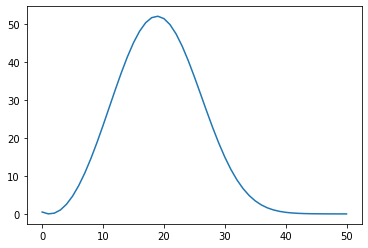

In [104]:
plt.plot(loss)

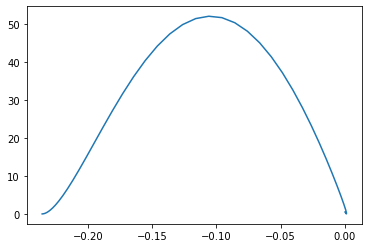

In [105]:
plt.plot(theta_0_list,loss)

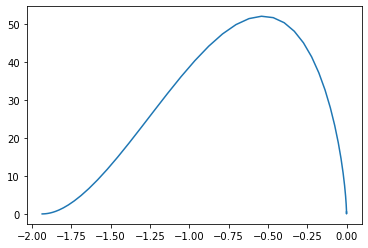

In [106]:
plt.plot(theta_1_list,loss)

In [107]:
df = df.sample(frac = 1)
df

,x,y
21,8.571429,-16.142857
10,4.081633,-7.163265
46,18.775510,-36.551020
20,8.163265,-15.326531
25,10.204082,-19.408163
28,11.428571,-21.857143
16,6.530612,-12.061224
24,9.795918,-18.591837
37,15.102041,-29.204082
8,3.265306,-5.530612


In [108]:
x = df['x'].to_numpy()
y = df['y'].to_numpy()

In [109]:
print(x)
print("-----------------------------------------------------------------------------------------")
print(y)

[ 8.57142857  4.08163265 18.7755102   8.16326531 10.20408163 11.42857143
  6.53061224  9.79591837 15.10204082  3.26530612  6.93877551 19.59183673
  9.3877551   0.81632653 18.36734694 13.06122449 17.95918367 17.14285714
 19.18367347 14.69387755  7.34693878  5.30612245  6.12244898  0.
  2.04081633 12.65306122 11.02040816 17.55102041 12.24489796 20.
  0.40816327 10.6122449   5.71428571 16.32653061  4.89795918  7.75510204
  3.67346939 13.46938776  4.48979592  1.2244898   2.44897959 15.91836735
  8.97959184  1.63265306 13.87755102 14.28571429  2.85714286 11.83673469
 16.73469388 15.51020408]
-----------------------------------------------------------------------------------------
[-16.14285714  -7.16326531 -36.55102041 -15.32653061 -19.40816327
 -21.85714286 -12.06122449 -18.59183673 -29.20408163  -5.53061224
 -12.87755102 -38.18367347 -17.7755102   -0.63265306 -35.73469388
 -25.12244898 -34.91836735 -33.28571429 -37.36734694 -28.3877551
 -13.69387755  -9.6122449  -11.24489796   1.         

In [110]:
theta_0 = 0
theta_1 = 0
epochs = 10000
alpha = 0.001

In [111]:
loss = []
theta_0_list = []
theta_1_list = []
hypo_list = []
def stochastic_gd(theta_0,theta_1,x,y,alpha,epochs):
    for i in range(epochs):
        for j in range(len(x)):
            theta_0_list.append(theta_0)
            theta_1_list.append(theta_1)
            hypo = theta_0 + theta_1*x
            hypo_list.append(hypo)
            #calculating Cost
            pre_cost = ((theta_0 + theta_1 * x[j]) - y[j])**2
            cost = pre_cost / 2
            loss.append(cost)
            
            #calculating diff part for theta_0
            dt0 = (theta_0 + theta_1 * x[j]) - y[j]
            #calculating diff part for theta_1
            dt1 = ((theta_0 + theta_1 * x[j]) - y[j])*x[j]
            
            #updating theta_0 and theta_1
            theta_0 = theta_0 - alpha*dt0 
            theta_1 = theta_1 - alpha*dt1

            grad = np.array (dt0 , dt1)
            grad_norm = np.sqrt(dt0**2 + dt1**2)
        if i!=0:
            if (grad_norm < 1 ) :
                break
            if ((loss[(i-1)*len(x)] - loss[i*len(x)]) < 0.01) :
                break
            
    return theta_0,theta_1,loss,theta_0_list,theta_1_list,hypo_list

        

In [112]:
theta_0,theta_1,loss,theta_0_history,theta_1_history,hypo_history = stochastic_gd(0,0,x,y,alpha,epochs)
print(theta_0,theta_1)

-0.10459748135952578 -1.9199167937387553


In [113]:
hypo = theta_0 + theta_1*x

In [114]:
r2 = r2_score(y,hypo)
print('r2 score is: ', r2)

r2 score is:  0.9977317585405382


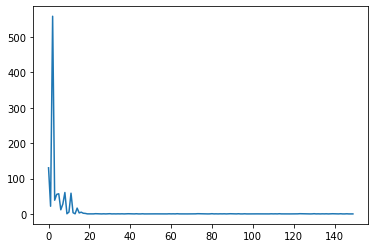

In [115]:
plt.plot(loss)

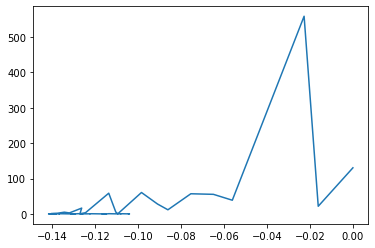

In [116]:
plt.plot(theta_0_list,loss)

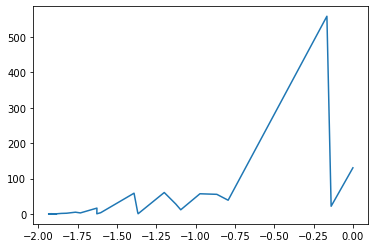

In [117]:
plt.plot(theta_1_list,loss)